# Assignment 2: Engineering Predictive Features

**Student Name:** Jonah Watson

**Date:** February 2, 2026

---

## Assignment Overview

In this assignment, you'll practice feature engineering by creating new predictive features from the Ames Housing dataset. You'll build a baseline model with raw features, engineer at least 5 new features based on real estate intuition, and measure how feature engineering improves model performance.

---

## Step 1: Import Libraries and Load Data

In [81]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [82]:
# Load the Ames Housing dataset
# TODO: Load train.csv from the data folder
df = pd.read_csv("data/train.csv")  # Replace with pd.read_csv()

# Display basic information
# TODO: Display the first few rows and basic info about the dataset
df.head()
df.info()

print("\n" + "="*80)
print("CHECKPOINT: Verify dataset loaded correctly")
print(f"Dataset shape: {df.shape if df is not None else 'Not loaded'}")
print("="*80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

---
## Step 2: Build Baseline Model with Raw Features

### Select Raw Features for Baseline

Select 10-15 raw features to use in your baseline model. Here's a suggested starting set (you can adjust):

**Suggested features:**
- `GrLivArea` - Above grade living area square feet
### - `OverallQual` - Overall material and finish quality
- `YearBuilt` - Original construction year
- `TotalBsmtSF` - Total basement square feet
- `FullBath` - Full bathrooms above grade
- `BedroomAbvGr` - Bedrooms above grade
- `GarageArea` - Size of garage in square feet
- `LotArea` - Lot size in square feet
- `Neighborhood` - Physical location (categorical)
- Add 5-10 more features you think are important

- 'OverallCond' - Overall condition rating
- 'ExterQual' - Exterior material quality
- 'GarageCars' - Size of garage in car capacity
- 'YearRemodAdd' - Remodel date
- 'RoofStyle' - Type of roof on the house

https://www.kaggle.com/code/alaasedeeq/house-price-prediction-top-8

In [83]:
# Select features for baseline model
# TODO: Create a list of feature names you want to use
baseline_features = [
    'GrLivArea',
    'OverallQual',
    'YearBuilt',
    'TotalBsmtSF',
    'FullBath',
    'BedroomAbvGr',
    'GarageArea',
    'LotArea',
    'Neighborhood',
    'OverallCond',
    'ExterQual',
    'GarageCars',
    'YearRemodAdd',
    'RoofStyle'
]

# TODO: Create X (features) and y (target) for baseline
# Make sure to handle missing values and encode categorical variables
X_baseline = baseline_features 
y = df['SalePrice'] 

print(f"Baseline features selected: {len(baseline_features)}")
print(f"Target variable shape: {y.shape if y is not None else 'Not defined'}")

Baseline features selected: 14
Target variable shape: (1460,)


### Preprocess Baseline Features

In [84]:
X_baseline = df[baseline_features].copy()
num_cols = X_baseline.select_dtypes(include=['number']).columns
cat_cols = X_baseline.select_dtypes(exclude=['number']).columns

# Handle missing values
# TODO: Fill missing values appropriately
# Numeric: Use median or 0
X_baseline[num_cols] = X_baseline[num_cols].fillna(X_baseline[num_cols].median())
# Categorical: Use 'None' or most frequent
X_baseline[cat_cols] = X_baseline[cat_cols].fillna('None')


# Encode categorical variables
# TODO: Use pd.get_dummies() for categorical features
X_baseline= pd.get_dummies(X_baseline, columns=cat_cols, drop_first=True)


print("\n" + "="*80)
print("CHECKPOINT: After preprocessing")
print(f"X_baseline shape: {X_baseline.shape if X_baseline is not None else 'Not defined'}")
print(f"Missing values: {X_baseline.isnull().sum().sum() if X_baseline is not None else 'N/A'}")
print("="*80)


CHECKPOINT: After preprocessing
X_baseline shape: (1460, 43)
Missing values: 0


### Train Baseline Model

In [85]:
# Split data into train and test sets
# TODO: Use train_test_split with test_size=0.2, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

# Train baseline Random Forest model
# TODO: Create and train RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Make predictions
# TODO: Generate predictions on test set
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)

# Calculate metrics
# TODO: Calculate R² and RMSE
baseline_r2 = r2_score(y_test, baseline_predictions)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))

print("\n" + "="*80)
print("BASELINE MODEL RESULTS")
print("="*80)
print(f"R² Score: {baseline_r2 if baseline_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${baseline_rmse:,.2f}" if baseline_rmse is not None else "RMSE: Not calculated")
print("="*80)


BASELINE MODEL RESULTS
R² Score: 0.8980601592916262
RMSE: $27,962.69


### Visualize Baseline Feature Importances

Index(['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'FullBath',
       'BedroomAbvGr', 'GarageArea', 'LotArea', 'OverallCond', 'GarageCars',
       'YearRemodAdd', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed'],
      dtype='object')
OverallQual     0.574

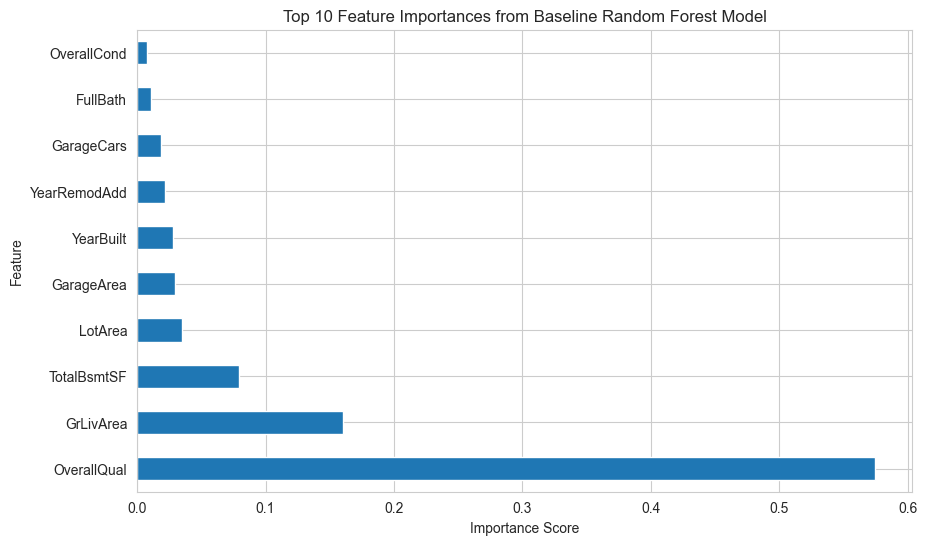


CHECKPOINT: Review which raw features are most important


In [86]:
# Extract and visualize feature importances
# TODO: Get feature importances from baseline_model
importances = baseline_model.feature_importances_
features = X_baseline.columns
print(features)

# TODO: Create a horizontal bar plot of top 10 features
feature_importances = pd.Series(importances, index=features)
top_features = feature_importances.nlargest(10)
print(top_features)

top_features.plot(kind='barh')
plt.title('Top 10 Feature Importances from Baseline Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


print("\n" + "="*80)
print("CHECKPOINT: Review which raw features are most important")
print("="*80)

---
## Step 3: Engineer New Features

### Feature 1: Total Bathrooms - Interaction Feature

**Business Justification:**
Combining full and half baths into a composite total helps measure the convenience and function of a home. It is often seen a measure to show how many people a house can support at the same time. I have often seen this metric used, and I believe it will help predict house prices as bathroom count is very important in real estate.

In [87]:
# TODO: Create your first engineered feature
df['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']


### Feature 2: Home Age - Derived Metric

**Business Justification:**
While having a separate year sold and year built metric is nice to have, similarly to feature 1, it is more convenient to just have a column called home age that combines the two. Having this column may also improve model accuracy, again similarly to feature 1, as it simplifies relationships in the model.

In [88]:
# TODO: Create your second engineered feature
df['HomeAge'] = df['YrSold'] - df['YearBuilt']

### Feature 3: Has Garage - Categorical Combination

**Business Justification:**
In running df_info() earlier, I noticed that not every home in the dataset has a garage, so similar to the assignment example, I chose to make a boolean column that indicates the existence of, in this case, a garage. I think a garage is one of the important factors of a home that doesn't necessarily exist in every home, whereas pretty much every single home has at least one bathroom or one bedroom. Depending on the climate, and how many people will be living in a house espeically, it is important to see if the house has garage or not. For the model, as I have been saying with every other engineered feature, the goal is to simplify the model and therefore improve it.

In [89]:
# TODO: Create your third engineered feature
df['HasGarage'] = df['GarageArea'] > 0

### Feature 4: Total Square Footage - Aggregation

**Business Justification:**
This feature combines basement square footage with above ground square footage to provide the total square footage of the house, which is extremely important. Square footage is paramount to home value, and so collapsing these two variables into one should simplify and improve the model's processes.

In [90]:
# TODO: Create your fourth engineered feature
df['TotalSF'] = df['TotalBsmtSF'] + df['GrLivArea']

### Feature 5: Quality Per Square Foot - Quality-Based Feature

**Business Justification:**
For this final engineered feature, I took the total square foot variable I created above, and divided overall quality by it to get an overall quality rating for the whole house. Both feature 4 and feature 5 together are extremely similar to the examples provided, but I made sure to include the basement square footage into the equation for determining quality per square foot. I kept with the example as well because I believe that something like quality square foot is a more general and useful metric than something like quality per number of bedrooms, number of bathrooms, or other variables

In [91]:
# TODO: Create your fifth engineered feature
df['QualityPerSqft'] = df['OverallQual'] / df['TotalSF']

### Add More Engineered Features (Optional)

You can create additional features beyond the required 5 if you think they'll improve performance.

In [ ]:
# Optional: Create additional engineered features


---
## Step 4: Train Model with Engineered Features

In [92]:
# Create feature list combining baseline + engineered features
# TODO: List all your engineered feature names
baseline_features = [
    'GrLivArea',
    'OverallQual',
    'YearBuilt',
    'TotalBsmtSF',
    'FullBath',
    'BedroomAbvGr',
    'GarageArea',
    'LotArea',
    'Neighborhood',
    'OverallCond',
    'ExterQual',
    'GarageCars',
    'YearRemodAdd',
    'RoofStyle'
]

engineered_features = [
    'TotalBathrooms',
    'HomeAge',
    'HasGarage',
    'TotalSF',
    'QualityPerSqft'
]

# Combine baseline and engineered features
all_features = baseline_features + engineered_features

# TODO: Create X_engineered with all features
# Remember to handle missing values and encode categoricals
X_engineered = df[all_features].copy()
num_cols = X_engineered.select_dtypes(include=['number']).columns
cat_cols = X_engineered.select_dtypes(exclude=['number']).columns

X_engineered[num_cols] = X_engineered[num_cols].fillna(X_engineered[num_cols].median())
X_engineered[cat_cols] = X_engineered[cat_cols].fillna('None')

X_engineered = pd.get_dummies(X_engineered, columns=cat_cols, drop_first=True)

print(f"Total features in engineered model: {len(all_features)}")
print(f"New engineered features: {len(engineered_features)}")

Total features in engineered model: 19
New engineered features: 5


In [94]:
# Split data (use same random_state for fair comparison)
# TODO: Split X_engineered and y
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_engineered, y, test_size=0.2, random_state=42)

# Train model with engineered features
# TODO: Train RandomForestRegressor(n_estimators=100, random_state=42)
engineered_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Make predictions
# TODO: Generate predictions on test set
engineered_model.fit(X_train_eng, y_train_eng)
engineered_predictions = engineered_model.predict(X_test_eng)

# Calculate metrics
# TODO: Calculate R² and RMSE
engineered_r2 = r2_score(y_test, engineered_predictions)
engineered_rmse = np.sqrt(mean_squared_error(y_test_eng, engineered_predictions))

print("\n" + "="*80)
print("ENGINEERED MODEL RESULTS")
print("="*80)
print(f"R² Score: {engineered_r2 if engineered_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${engineered_rmse:,.2f}" if engineered_rmse is not None else "RMSE: Not calculated")
print("="*80)


ENGINEERED MODEL RESULTS
R² Score: 0.8967299581016281
RMSE: $28,144.54


---
## Step 5: Compare Models and Identify Most Valuable Features

### Create Comparison Table

In [95]:
# Create comparison DataFrame
# TODO: Create a table comparing baseline vs engineered model
comparison_table = pd.DataFrame({
    'Model': ['Baseline', 'Engineered'],
    'R² Score': [baseline_r2, engineered_r2],
    'RMSE': [baseline_rmse, engineered_rmse]
})

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
print(comparison_table)
print("="*80)

# Calculate improvement
if baseline_r2 is not None and engineered_r2 is not None:
    r2_improvement = ((engineered_r2 - baseline_r2) / baseline_r2) * 100
    rmse_improvement = ((baseline_rmse - engineered_rmse) / baseline_rmse) * 100
    print(f"\nR² Improvement: {r2_improvement:.2f}%")
    print(f"RMSE Improvement: {rmse_improvement:.2f}%")


MODEL COMPARISON
        Model  R² Score          RMSE
0    Baseline   0.89806  27962.686419
1  Engineered   0.89673  28144.536038

R² Improvement: -0.15%
RMSE Improvement: -0.65%


### Visualize Feature Importances from Engineered Model

Index(['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'FullBath',
       'BedroomAbvGr', 'GarageArea', 'LotArea', 'OverallCond', 'GarageCars',
       'YearRemodAdd', 'TotalBathrooms', 'HomeAge', 'TotalSF',
       'QualityPerSqft', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard

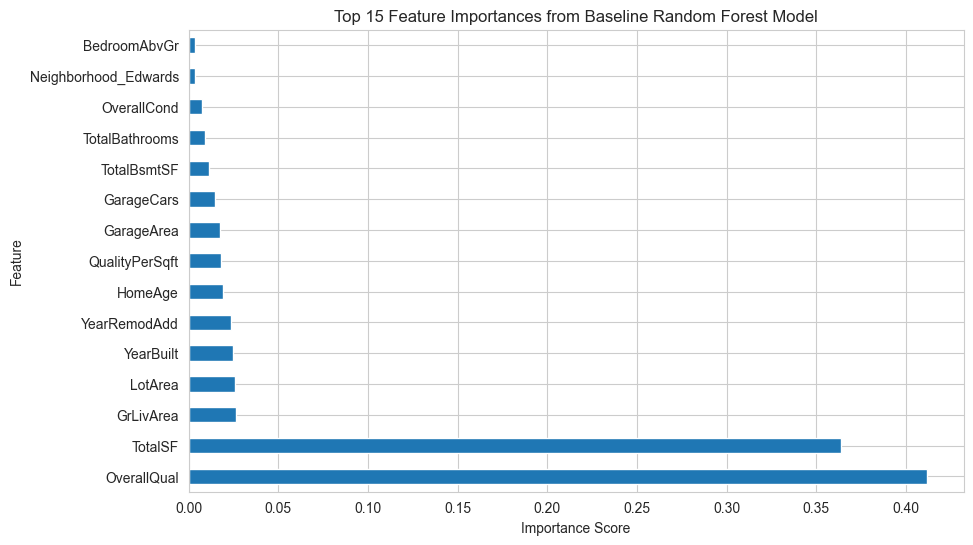

In [96]:
# Extract and visualize top 15 feature importances
# TODO: Get feature importances from engineered_model
importances_eng = engineered_model.feature_importances_
features_eng = X_engineered.columns
print(features_eng)

# TODO: Create horizontal bar plot of top 15 features
feature_importances = pd.Series(importances_eng, index=features_eng)
top_features = feature_importances.nlargest(15)
print(top_features)

top_features.plot(kind='barh')
plt.title('Top 15 Feature Importances from Baseline Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


### Analysis: Most Valuable Features

**Write 3-5 bullet points analyzing your results:**

- [Which of YOUR engineered features appeared in the top 15 most important features?]

TotalSF (#2), HomeAge (#7), QualityPerSqft (#8), and TotalBathrooms (#12).
The only engineered feature which didn't appear is HasGarage.


- [Why do you think these specific features performed well?]

For the four of the engineered features that did appear, each of them represent a mix of two columns that are now combined in some way and simplified for the model to have an easier time working with these models. Even prior to seeing the results, I would've argued each that of these four things are veyr important to home value. 


- [Were any engineered features less valuable than you expected? Why?]

Not necessarily. I figured that HasGarage would be the least important but it seems to even be less important than I thought it would be.
TotalSF being as valuable as it is did not suprise me. I did think that QualityPerSqft would have stronger impact but overall it was meaningful regardless.


- [What did you learn about feature engineering from this analysis?]

I do see the value of feature engineering from this assignment. The idea is to mutate the raw data into variables that are most easily understood by predictive modeling. Unfortuntely, in this case, adding engineered features actually performed my model to perform a slight bit worse, but when I tried to remove variables that were involved in the engineering process to reduce redundancy, the performance was even worse. I tested the model as well with only using 4 of my engineered variables at once out of the 5, and found the results to all be nearly identical. Like I said though, I absolutely see the value in feature engineering. I would like to use this technique on different datasets to see how it impacts the results because I'm sure in most cases it does improve model results.


- [If you were to create more features, what would you try based on these results?]

I would try to reduce dedunancy again, but also include some different variables that were not present here. I like most of my engineered variables but I think HasGarage could be reworked into a different "Has" variable, or removed altogether.

---
## Step 6: Submit Your Work

Before submitting:
1. Make sure all code cells run without errors
2. Verify you have at least 5 engineered features with business justifications
3. Check that your comparison table and visualizations display correctly
4. Complete the analysis section above

Then push to GitHub:
```bash
git add .
git commit -m 'completed feature engineering assignment'
git push
```

Submit your GitHub repository link on the course platform.